In [524]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract

In [525]:
img = cv2.imread('2kscreen.png')
template = cv2.imread('2ktempl.png')
w = template.shape[1]
h = template.shape[0]
W = img.shape[1]
H = img.shape[0]
print(w, h, W, H)

In [526]:
w, h, W, H

(17, 17, 2560, 1390)

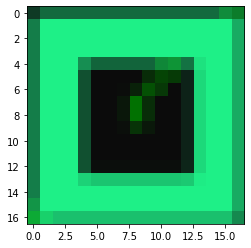

In [527]:
plt.imshow(template)

In [528]:
method = cv2.TM_CCORR_NORMED
color = (0, 0, 255)
resultimg = img.copy()

# Apply template Matching
res = cv2.matchTemplate(resultimg, template, method)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
# if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
#     top_left = min_loc
# else:
#     top_left = max_loc
# bottom_right = (top_left[0] + w, top_left[1] + h)
# print(top_left)

# cv2.rectangle(resultimg, top_left, bottom_right, 255, 2)


# plt.show()
# plt.imsave("result.png", resultimg)
# plt.imsave("res.png", res)

In [529]:
def remove_same(pts, threshold):
    elements = []
    for x,y in pts:
        for ele in elements:
            if ((x-ele[0])**2 + (y-ele[1])**2) < threshold**2:
                break
        else:
            elements.append((x,y))
    
    return elements

In [530]:
threshold = 0.9
loc = np.where(res >= threshold)
textimgs = []

pts = zip(*loc[::-1])
planes = remove_same(pts, min(template.shape[0], template.shape[1]))
print(planes)

for pt in planes:
    x1 = pt[0]-40
    x2 = pt[0]+60
    y1 = pt[1]-60
    y2 = pt[1]
    textimgs.append(img[y1:y2, x1:x2, :])
    cv2.rectangle(resultimg, (pt[0]-45, pt[1]-50), (pt[0]+55, pt[1]), color, 2)
    
plt.imsave("result.png", resultimg)

[(1023, 471), (2299, 538), (1464, 765), (1474, 862), (1222, 999), (906, 1327)]


(60, 100, 3)
272 NYKER



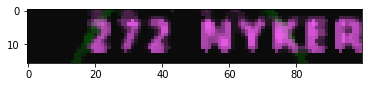

In [531]:
textimg = textimgs[3]
print(textimg.shape)
plt.imshow(textimg)
lh = 16 # lineheight
ls = 42 # linestart
lineimg = textimg[ls:ls+lh,:]
plt.imshow(lineimg)
lineimg_median = cv2.medianBlur(lineimg, 3)
plt.imshow(lineimg_median)
text = pytesseract.image_to_string(lineimg_median, lang='eng')

print(text)
## medium filter

## first 17, 10
## mid  16, 26
## last 17 39

In [532]:
# # All the 6 methods for comparison in a list
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
 
# for meth in methods[:1]:
#     img = img2.copy()
#     method = eval(meth)
 
#     # Apply template Matching
#     res = cv2.matchTemplate(img,template,method)
#     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
#     print(min_loc, max_loc)
 
#     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
#     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
#         top_left = min_loc
#     else:
#         top_left = max_loc
#     bottom_right = (top_left[0] + w, top_left[1] + h)
 
#     cv2.rectangle(img,top_left, bottom_right, 255, 2)
 
#     plt.subplot(121),plt.imshow(res,cmap = 'gray')
#     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(img)
#     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#     plt.suptitle(meth)
 
#     plt.show()
#     plt.imsave("result"+meth+".png", img)

(83, 1183, 3)
(30, 1183, 3)
KLM725 (E75L), maintaining flight level 70, speed 250 knots, direct to SPL. Distance to cursor d = 47 miles.



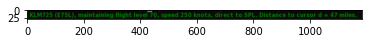

In [613]:
image = cv2.imread('info2.png')
print(image.shape)

# wordimg = image[:, 3:54]
# wordimg = image[:, 55:92]
# wordimg = image[:, 95:130]
# wordimg = image[:, 133: 165]
# wordimg = image[:, 166:200]
wordimg = image[30:60]
print(wordimg.shape)
plt.imshow(wordimg)
text = pytesseract.image_to_string(wordimg, lang='eng')
print(text)